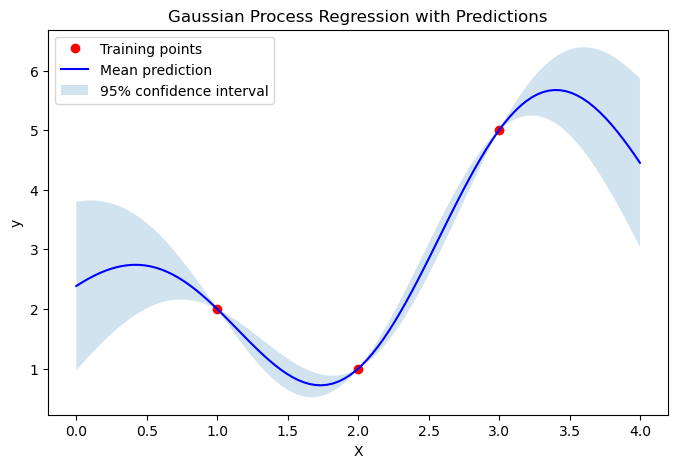

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

def rbf_kernel(X1, X2, length_scale=1.0, sigma_f=1.0):
    """Radial Basis Function (RBF) kernel (Gaussian Kernel)."""
    sqdist = cdist(X1, X2, 'sqeuclidean')
    return sigma_f ** 2 * np.exp(-0.5 / length_scale ** 2 * sqdist)

def gaussian_process_regression(X_train, y_train, X_test, length_scale=1.0, sigma_f=1.0, noise=1e-5):
    """Gaussian Process Regression (GPR) implementation."""
    K = rbf_kernel(X_train, X_train, length_scale, sigma_f) + noise * np.eye(len(X_train))
    K_s = rbf_kernel(X_train, X_test, length_scale, sigma_f)
    K_ss = rbf_kernel(X_test, X_test, length_scale, sigma_f) + noise * np.eye(len(X_test))
    
    K_inv = np.linalg.inv(K)
    
    # Mean prediction
    mu_s = K_s.T @ K_inv @ y_train
    
    # Covariance prediction
    cov_s = K_ss - K_s.T @ K_inv @ K_s
    
    return mu_s, cov_s

def predict(X_train, y_train, X_test, length_scale=1.0, sigma_f=1.0, noise=1e-5):
    """Generate predictions with uncertainty sampling."""
    mu_s, cov_s = gaussian_process_regression(X_train, y_train, X_test, length_scale, sigma_f, noise)
    return mu_s, cov_s

# Example usage:
X_train = np.array([[1], [2], [3]])
y_train = np.array([2, 1, 5])
X_test = np.linspace(0, 4, 100).reshape(-1, 1)

mu_s, cov_s = predict(X_train, y_train, X_test)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(X_train, y_train, "ro", label="Training points")
plt.plot(X_test, mu_s, "b-", label="Mean prediction")
plt.fill_between(X_test.flatten(), 
                 mu_s - 1.96 * np.sqrt(np.diag(cov_s)), 
                 mu_s + 1.96 * np.sqrt(np.diag(cov_s)), 
                 alpha=0.2, label="95% confidence interval")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Gaussian Process Regression with Predictions")
plt.show()

In [32]:
cov_s

array([[ 0.51938198,  0.5021406 ,  0.48369631, ..., -0.07096139,
        -0.07075035, -0.07028062],
       [ 0.5021406 ,  0.48592869,  0.46848686, ..., -0.07142377,
        -0.07121739, -0.07075035],
       [ 0.48369631,  0.46848686,  0.45208729, ..., -0.07162446,
        -0.07142377, -0.07096139],
       ...,
       [-0.07096139, -0.07142377, -0.07162446, ...,  0.45208729,
         0.46848686,  0.48369631],
       [-0.07075035, -0.07121739, -0.07142377, ...,  0.46848686,
         0.48592869,  0.5021406 ],
       [-0.07028062, -0.07075035, -0.07096139, ...,  0.48369631,
         0.5021406 ,  0.51938198]])